Edge detection with Neural Networks
==============
Rupert Brooks August 2018

In this notebook we explore using neural networks to detect edges in images

Preliminaries
-------

In [2]:
%%javascript 
_=IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;   }

<IPython.core.display.Javascript object>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization
from mpl_toolkits.mplot3d import axes3d
import cv2
import matplotlib as mpl


from skimage import data, io, filters, feature

Recall that we can perform simple edge detection using some fairly simple filters
* First order
  - Gradient magnitude
  - Sobel (which is an approximation of gradient magnitude)
* Second order
  - Laplacian

In each case, there is a simple linear filter or filters at the "front end", followed by a nonlinear conversion to "edginess". 

Think about locality here.


(Get peppers image, it is being used a lot) Oddly, the matlab peppers image is not the same test peppers image as is commonly found on the web.

Lets keep it simple, we will generate a simple filter ourselves - there are endless tweaks and variations in libraries, but that is not the point here.

uint8


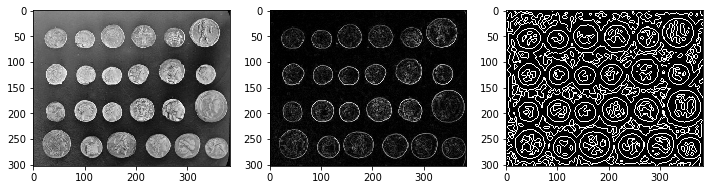

In [121]:
image = data.coins()
print(image.dtype)

def GradientEdges(image,kernelsize=3):
    kdx,kdy=cv2.getDerivKernels(1,1,kernelsize,normalize=True)
    edgex=cv2.filter2D(image/np.float32(255.0),-1,kdx)
    edgey=cv2.filter2D(image/np.float32(255.0),-1,kdy.T)
    return (np.sqrt(edgex**2+edgey**2)*255).astype(np.uint8)

def LaplacianEdges(image,kernelsize=3):
    if kernelsize>0:
        laplacian=cv2.Laplacian(cv2.GaussianBlur(image/np.float32(255.0),(0,0),kernelsize),-1)
    else:
        laplacian=cv2.Laplacian(image/np.float32(255.0),-1)
    #laplacian=laplacian*255.0+127.5
    #laplacian[laplacian<0]=0
    #laplacian[laplacian>255]=255
    k=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    localmin = cv2.erode(laplacian, k)
    localmax = cv2.dilate(laplacian, k)
    threshold=0.00
    zeroCross = np.logical_or(np.logical_and(localmin < -1*threshold,  laplacian > 0), 
                              np.logical_and(localmax > threshold, laplacian < 0))
    return (zeroCross*255).astype(np.uint8)



fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(1,3,1)
ax.imshow(image,cmap='gray')
ax=fig.add_subplot(1,3,2)
ax.imshow(GradientEdges(image),cmap='gray')
ax=fig.add_subplot(1,3,3)
ax.imshow(LaplacianEdges(image),cmap='gray')



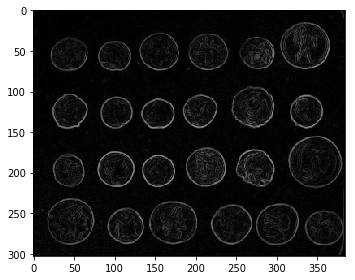

In [5]:
image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

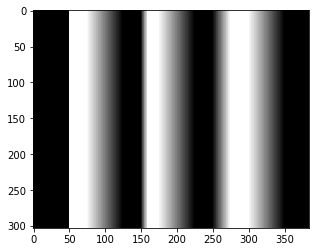

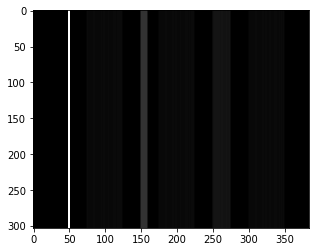

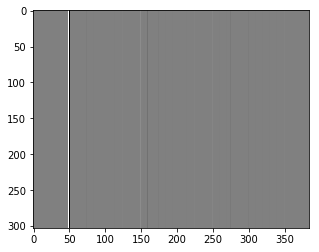

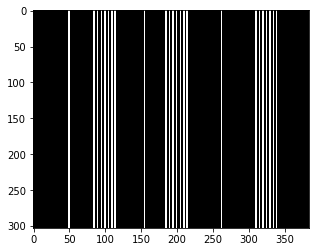

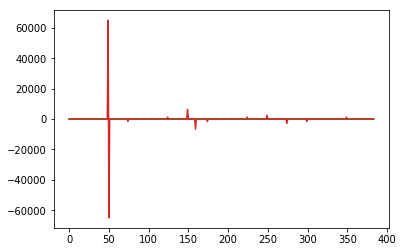

In [122]:
img =np.zeros_like(image)
for i in range(img.shape[1]):
    if i >= 50 and i < 75:
        img[:,i]=255
    if i >= 75 and i < 125:
        img[:,i]=255*(1.0-(i-74)/50.0)
    if i >= 150 and i < 160:
        img[:,i]=255*(i-149)/10.0
    if i >= 160 and i < 175:
        img[:,i]=255
    if i >= 175 and i < 225:
        img[:,i]=255*(1-(i-174)/50.0)
    if i >= 250 and i < 275:
        img[:,i]=255*(i-249)/25.0
    if i >= 275 and i < 300:
        img[:,i]=255
    if i >= 300 and i < 350:
        img[:,i]=255*(1-(i-299)/50.0)

plt.imshow(img,cmap='gray')
plt.show()
edges = GradientEdges(img)
plt.imshow(edges,cmap='gray')
plt.show()
plt.imshow(cv2.Laplacian(img.astype(np.float32),-1),cmap='gray')
#io.imshow(cv2.Laplacian(cv2.GaussianBlur(img/np.float32(255.0),(0,0),3),-1))
plt.show()
edges2 = LaplacianEdges(img,kernelsize=3)
plt.imshow(edges2,cmap='gray')
plt.show()
#edges2 = feature.canny(img,sigma=3)
#io.imshow(edges2)
#io.show()
plt.plot(img[int(img.shape[0]/2),:])
plt.plot(edges[int(img.shape[0]/2),:])
plt.plot(edges2[int(img.shape[0]/2),:]*255)
Z=cv2.Laplacian(img.astype(np.float32),-1)
plt.plot(Z[int(img.shape[0]/2),:]*255)




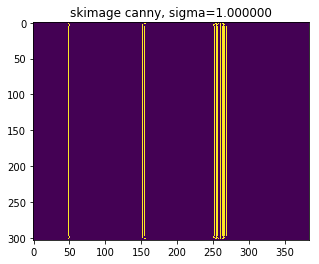

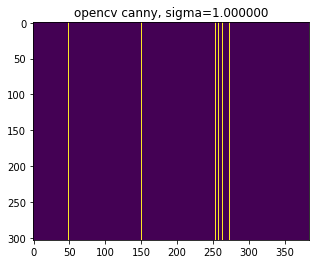

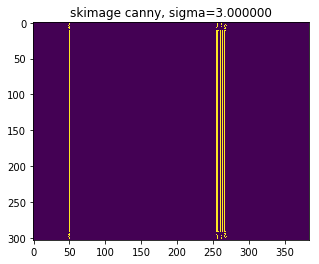

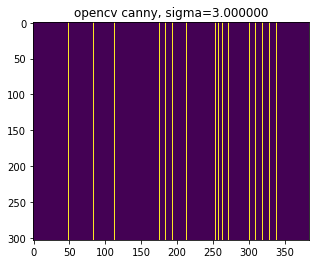

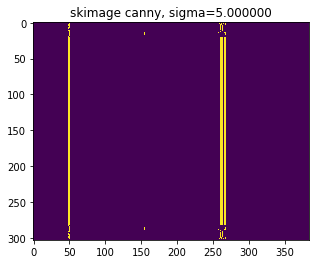

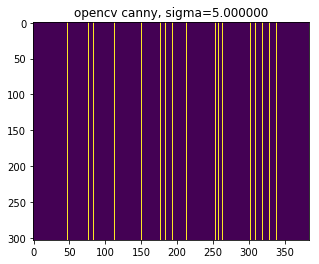

In [23]:
#skimage guidelines for canny thresholds are 0.1 * max for low and 0.2 * max for high
for i in [1,3,5]:
    edges2 = feature.canny(img,sigma=i)
    plt.imshow(edges2)
    plt.title("skimage canny, sigma=%f"%(i))
    plt.show()
    edges2 = cv2.Canny(img,255*0.2,255*0.1,apertureSize=2+i)
    plt.imshow(edges2)
    plt.title("opencv canny, sigma=%f"%(i))
    plt.show()


(array([65, 47]), array([451, 315]))
(268, 386)


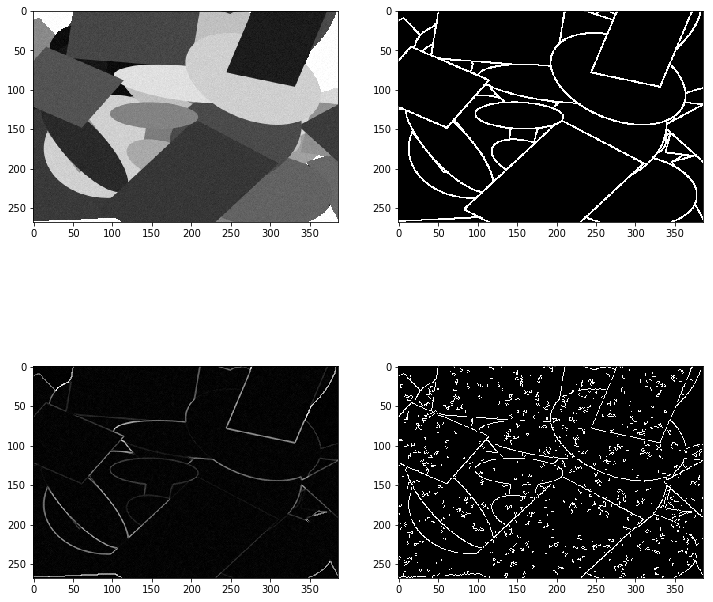

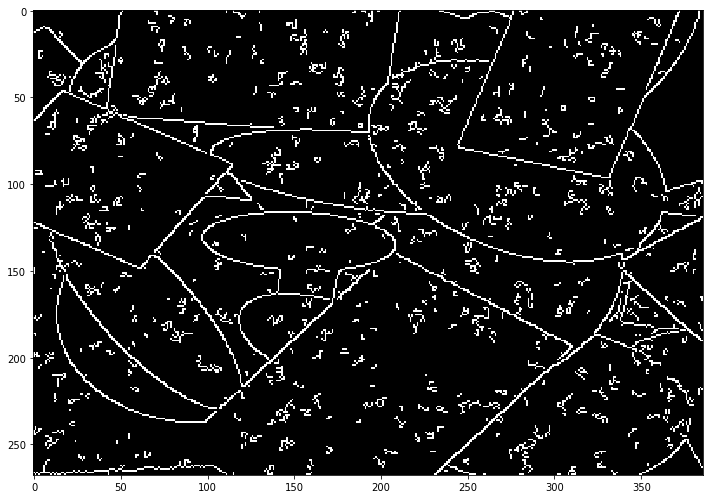

In [168]:

def generate_image():
    ellipses=[]
    thefigsize=(7,5)
    for i in range(50):
        ellipses.append([np.random.randint(2),
                         np.random.uniform(-1.,1,2),
                         np.random.uniform(0.25,1.25),
                         np.random.uniform(0.25,1.25),
                         np.random.uniform(0,2*360),
                         np.random.uniform(0,0.9)])
    fig=plt.figure(figsize=thefigsize)
    ax=fig.add_subplot(1,1,1)
    ax.axis([-1.2,1.2,-1.2,1.2])
    plt.axis("off")
    for e in ellipses:
        if e[0]==0:
            p = mpl.patches.Ellipse( e[1], e[2], e[3], angle=e[4], facecolor=(e[5],e[5],e[5]), ec=None)#, alpha=i/alias)
        else:
            p = mpl.patches.Rectangle( e[1], e[2], e[3], angle=e[4], facecolor=(e[5],e[5],e[5]), ec=None)
        ax.add_artist(p)
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer ( fig.canvas.tostring_rgb(), dtype=np.uint8 )
    buf.shape = ( h, w,3 )
    transinfo=(np.ceil(ax.transData.transform((-1.19,-1.19))).astype(np.int),
               np.floor(ax.transData.transform((1.19,1.19))).astype(np.int))
    print(transinfo)
    img=buf[transinfo[0][1]:transinfo[1][1],transinfo[0][0]:transinfo[1][0],0]
    #img=cv2.GaussianBlur(img,(0,0),np.random.uniform(0.05,4),-1)
    img=np.clip(np.float64(img)+np.random.standard_normal(img.shape)*np.random.uniform(2,5),0,255).astype(np.uint8)
    
 
    plt.close(fig)

    fig=plt.figure(figsize=thefigsize)
    ax=fig.add_subplot(1,1,1)
    ax.axis([-1.2,1.2,-1.2,1.2])
    plt.axis("off")
    for e in ellipses:
        if e[0]==0:
            p = mpl.patches.Ellipse( e[1], e[2], e[3], angle=e[4], facecolor='white', ec='black', aa=False)#, alpha=i/alias)
        else:
            p = mpl.patches.Rectangle( e[1], e[2], e[3], angle=e[4], facecolor='white', ec='black', aa=False)
        ax.add_artist(p)
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    ebuf = np.frombuffer ( fig.canvas.tostring_rgb(), dtype=np.uint8 )
    ebuf.shape = ( h, w,3 )
 
    plt.close(fig)

    return img,255-ebuf[transinfo[0][1]:transinfo[1][1],transinfo[0][0]:transinfo[1][0],0]

Z,Ze=generate_image()
print(Z.shape)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(Z,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(Ze,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(GradientEdges(Z),cmap='gray')
plt.subplot(2,2,4)
plt.imshow(cv2.Canny(Z,255*0.2,255*0.1,apertureSize=3),cmap='gray')
plt.show()
plt.figure(figsize=(12,12))
plt.imshow(cv2.Canny(Z,255*0.2,255*0.1,apertureSize=3),cmap='gray')


Could we use a small neural network as an edge detector?

How to train - need examples with edges.

What about missing data around the edges?

In [ ]:
# tile
# break image into tilesize chunks

def get_tile_for(image,tilesize,spacing,position):
    